## OMEGA-MAPPIN - Map Comparisons

This notebook runs through the analysis comparing different data types. 

Maps are all put into the same space - the 7500 vertices of the template brain. 
- Oscs, slopes, genes and terms are defined for each vertex.
- Anat is defined over ROIs

Data types availabe: electrophys (oscillations and slopes), genes, terms, and anatomical. 

In [1]:
# Import general code from custom module om, and OO code for handling data
import sys
sys.path.append('/Users/thomasdonoghue/Documents/GitCode/omegamappin/')
from om.gen import *                    # Import general code 
from om.cl_md import *                  # Import Meg-Data classes
from om.cl_mc import *                  # Import Meg-Comp classes

# Set plots to display inline
%matplotlib inline

In [ ]:
# Initialize MapComp object and oscillatory bands list
om_maps = MapComp()
osc_bands = ['Theta', 'Alpha', 'Beta', 'LowGamma']

In [ ]:
# Check files that are available
om_maps.check_files()

In [ ]:
# Load oscillation maps - here using the oscillation scores
om_maps.load_meg_maps(osc_file='Group_Osc_Scores', slope_file='Group_Slopes')

### TERM ANALYSIS

NOTES...

In [ ]:
# Load term maps - here using 10 mm spatial estimation
om_maps.load_term_maps('all_terms_r10_gaussian_estimation.csv')

In [ ]:
# Calculate the correlation between oscillation maps and terms
for osc in osc_bands:
    om_maps.calc_corrs('Terms', osc)

In [ ]:
# Print out highest correlated terms for each oscillation band
for osc in osc_bands:
    om_maps.check_corrs('Terms', osc)

In [ ]:
# Plot an example of distribution of R values and P values
om_maps.plot_corrs('Terms', 'Theta')

In [ ]:
# Save calculated osc correlations to file
for osc in osc_bands:
    om_maps.save_corrs('Terms', osc, save_as_npz=True, save_as_csv=True)

In [ ]:
# Calculate correlations with slopes
om_maps.calc_corrs('Terms', 'Slopes')

In [ ]:
# Check the correlations between term values and slope values
om_maps.check_corrs('Terms', 'Slopes')

In [ ]:
# Plot correlation R- and p-vals between terms & slopes
om_maps.plot_corrs('Terms', 'Slopes')

In [ ]:
# Save out correlations between terms and slopes
om_maps.save_corrs('Terms', 'Slopes')

In [ ]:
# Unload terms - terms & genes are quite large. Unload terms since no longer needed.
om_maps.unload_data('Terms')

### GENE ANALYSIS

NOTES...

In [ ]:
# Load Gene maps - note that genes are split up into 3 files. These are concatenated for analysis. 

# List of gene files
gene_files = ['all_real_genes_donor9861_r10_coords1of3_zscored_gaussian_estimation.csv',
              'all_real_genes_donor9861_r10_coords2of3_zscored_gaussian_estimation.csv',
              'all_real_genes_donor9861_r10_coords3of3_zscored_gaussian_estimation.csv']

# Load gene files
om_maps.load_gene_maps(gene_files)

In [ ]:
# Calculate the correlation between oscillation maps and genes
for osc in osc_bands:
    om_maps.calc_corrs('Genes', osc)

In [ ]:
# Print out highest correlated genes for each oscillation band
for osc in osc_bands:
    om_maps.check_corrs('Genes', osc)

In [ ]:
# Save calculated correlations to file
for osc in osc_bands:
    om_maps.save_corrs('Genes', osc, save_as_npz=True, save_as_csv=True)

In [ ]:
# Calculate the correlation between slopes and genes
om_maps.calc_corrs('Genes', 'Slopes')

In [ ]:
# Print out the highest correlated genes for slopes
om_maps.check_corrs('Genes', 'Slopes')

In [ ]:
# Save calculated correlations to file
om_maps.save_corrs('Genes', 'Slopes', save_as_npz=True, save_as_csv=True)

### ANATOMY ANALYSIS

NOTES...

In [2]:
# Initiliaze Map Comp object in ROI space
om_ROI_maps = MapCompROI()

In [3]:
# Load MEG oscillation & slope data
om_ROI_maps.load_meg_maps(osc_file='Group_Osc_Scores')

In [4]:
# Load MEG ROIs
elec_roi_path = '/Users/thomasdonoghue/Desktop/scout_Desikan-Killiany_68.mat'
om_ROI_maps.load_elec_rois(elec_roi_path)

In [26]:
# Load anatomy data
#om_ROI_maps.load_anat_maps('whole_brain_FreeSurferDKT_count.mat', 'count')
om_ROI_maps.load_anat_maps('whole_brain_FreeSurferDKT_qa.mat', 'count')

In [27]:
# Align ROIs from MEG & Anat
om_ROI_maps.align_rois()

In [28]:
# Convert MEG data into ROIs
om_ROI_maps.conv_meg_rois()

In [32]:
# Compare anatomical connectivity to MEG data
om_ROI_maps.comp_meg_anat(section='all')

Anatomical data used is:  count
Correlation between MEG and anatomical connectivity: 

Theta
    R value:  0.1908
    P value:  1.828e-16
Beta
    R value:  0.2336
    P value:  4.162e-24
LowGamma
    R value:  0.0004377
    P value:  0.9851
Alpha
    R value:  0.1939
    P value:  5.921e-17


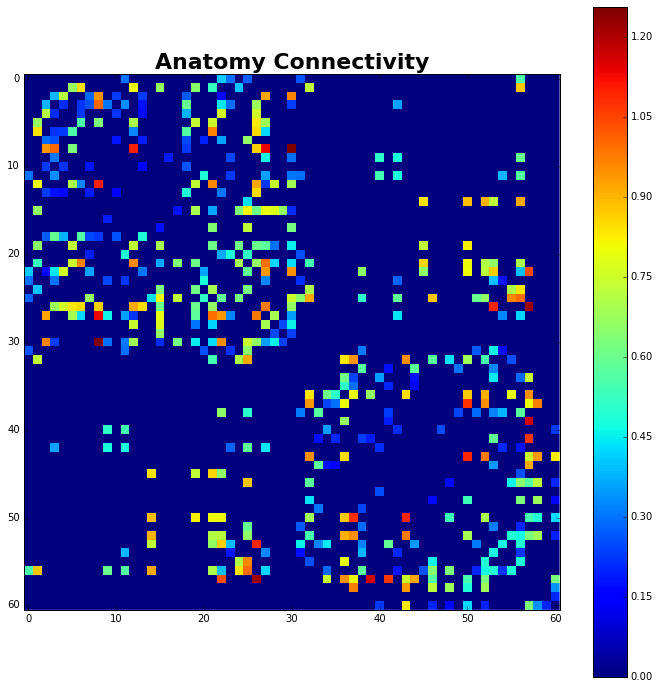

In [13]:
# Plot the connectivity matrix for the anatomical data
om_ROI_maps.plot_mat('anat', section='all')

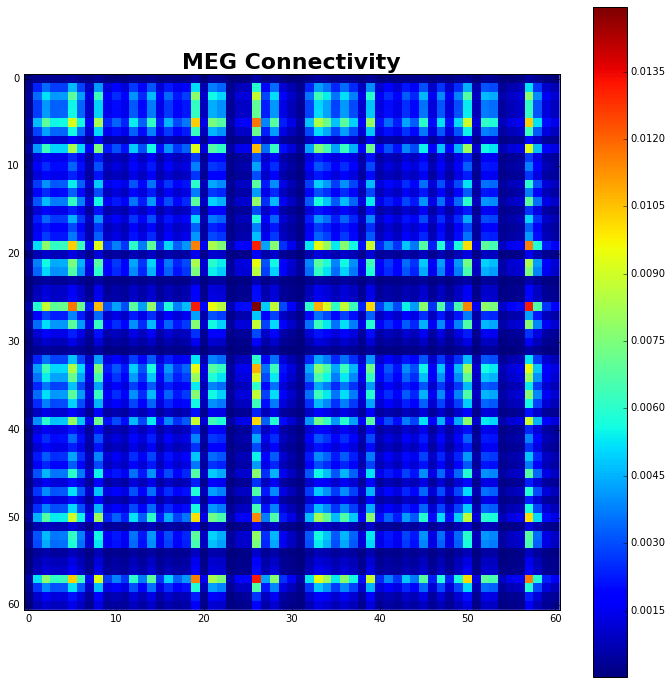

In [14]:
# Plot the connectivity matrix for the meg data
om_ROI_maps.plot_mat('meg', 'Alpha', section='all')